In [2]:
# import library
import tensorflow as tf
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img=cv2.imread('D:/projects/drowziness new/train/open_eyes/s0001_01843_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)

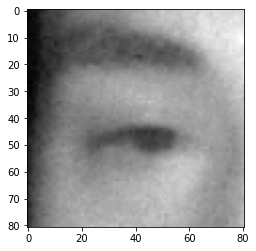

In [3]:
plt.imshow(img,cmap='gray')

In [4]:
img.shape

(81, 81)

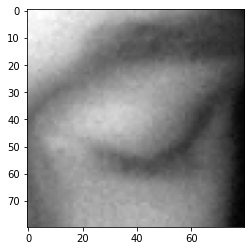

In [5]:
datadirectory="D:/projects/drowziness new/train/"
classes=['close_eyes','open_eyes']
for category in classes:
    path=os.path.join(datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [5]:
img_size=224

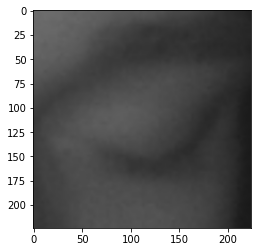

In [6]:
img_size=224
new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [7]:
# reading all images  ans converting to array for data and labels

In [8]:
training_data=[]
def create_training_data():
    for category in classes:
        path=os.path.join(datadirectory,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            new_array=cv2.resize(backtorgb,(img_size,img_size))
            training_data.append([new_array,class_num])


In [9]:
 create_training_data()

In [10]:
print(len(training_data))

1958


In [11]:
import random
random.shuffle(training_data)

In [12]:
x=[]
y=[]

for features,label in training_data:
    x.append(features)
    y.append(label)
    
x=np.array(x).reshape(-1,img_size,img_size,3) #3 rgb 3 channel

In [13]:
x.shape

(1958, 224, 224, 3)

In [14]:
#normalize data
x=x/255.0  #we r mormalizing the data

In [15]:
y=np.array(y)

In [16]:
import pickle

In [17]:
pickle_out=open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [18]:
pickle_in=open('x.pickle','rb')
x=pickle.load(pickle_in)

pickle_in=open('y.pickle','rb')
y=pickle.load(pickle_in)

deep laerning model for training

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
model=tf.keras.applications.mobilenet.MobileNet()

In [14]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

transefer learning

In [15]:
base_input=model.layers[0].input  #input

In [16]:
base_output=model.layers[-4].output  #output

In [19]:
flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(flat_layer)  ## one node 1/0
final_output=layers.Activation('sigmoid')(final_output)

In [20]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [21]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

setting for binary classification

In [22]:
new_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
new_model.fit(x,y,epochs=30,validation_split=0.1)  ##training

Epoch 1/30
56/56 [==============================] - 245s 4s/step - loss: 0.1481 - accuracy: 0.9586 - val_loss: 2.0704 - val_accuracy: 0.5969
Epoch 2/30
56/56 [==============================] - 198s 4s/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 5.3133 - val_accuracy: 0.5306
Epoch 3/30
56/56 [==============================] - 192s 3s/step - loss: 0.0295 - accuracy: 0.9892 - val_loss: 5.2664 - val_accuracy: 0.5102
Epoch 4/30
56/56 [==============================] - 197s 4s/step - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.8487 - val_accuracy: 0.8214
Epoch 5/30
56/56 [==============================] - 200s 4s/step - loss: 0.0141 - accuracy: 0.9966 - val_loss: 0.4153 - val_accuracy: 0.8776
Epoch 6/30
56/56 [==============================] - 190s 3s/step - loss: 0.0570 - accuracy: 0.9801 - val_loss: 0.0581 - val_accuracy: 0.9745
Epoch 7/30
56/56 [==============================] - 188s 3s/step - loss: 0.0188 - accuracy: 0.9949 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 8/30
56

In [29]:
new_model.save('drow_model.h5')

In [3]:
model=tf.keras.models.load_model('drow_model.h5')

check prediction

In [6]:
img_array=cv2.imread('D:/projects/drowziness new/train/close_eyes/s0002_00667_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [7]:
x_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [8]:
x_input.shape

(1, 224, 224, 3)

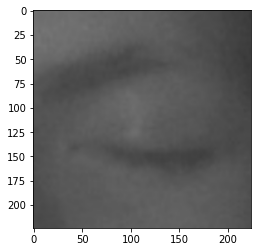

In [9]:
plt.imshow(new_array)

In [10]:
x_input=x_input/255.0

In [23]:
prediction=new_model.predict(x_input)

1/1 [==============================] - 1s 1s/step


In [24]:
prediction

array([[0.7688715]], dtype=float32)

In [25]:
img=cv2.imread('D:/projects/drowziness new/EYES-WIDE-OPEN.jpg')

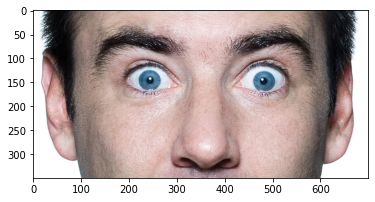

In [26]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [27]:
facecascade=cv2.CascadeClassifier('C:\\Users\\sande\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')

In [28]:
eyecascade=cv2.CascadeClassifier('C:\\Users\\sande\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\data\\haarcascade_eye.xml')

In [29]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes=eyecascade.detectMultiScale(gray,1.1,4)

In [30]:
for (r,s,t,u) in eyes:
    cv2.rectangle(img,(r,s),(r+t,s+u),(0,255,0),2)

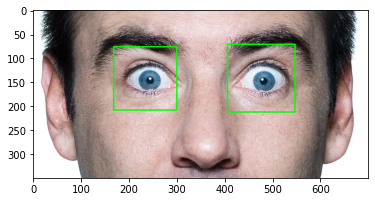

In [31]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

crop eye image

In [32]:
eyecascade=cv2.CascadeClassifier('C:\\Users\\sande\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\data\\haarcascade_eye.xml')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes=eyecascade.detectMultiScale(gray,1.1,4)
for (r,s,t,u) in eyes:
    roi_gray=gray[s:s+u, r:r+t]
    roi_color=img[s:s+u, r:r+t]
    eyess=eyecascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print('eyes not detected')
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey: ey+eh, ex:ex+ew]

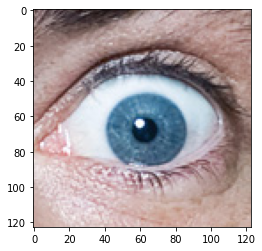

In [33]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [34]:
eyes_roi.shape

(123, 123, 3)

In [35]:
final_img=cv2.resize(eyes_roi,(224,224))
final_img=np.expand_dims(final_img,axis=0)# need forth dimension
final_img=final_img/255.0

In [36]:
final_img.shape

(1, 224, 224, 3)

In [37]:
prediction=new_model.predict(final_img)
prediction

1/1 [==============================] - 0s 129ms/step


array([[0.92955977]], dtype=float32)

In [51]:
facecascade=cv2.CascadeClassifier('C:\\Users\\sande\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(0)
if cap.isOpened():
    cap=cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError('cannot open webcam')
    
while True:
    ret,frame=cap.read()
    eyecascade=cv2.CascadeClassifier('C:\\Users\\sande\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\data\\haarcascade_eye.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes=eyecascade.detectMultiScale(gray,1.1,4)
    for (r,s,t,u) in eyes:
        roi_gray=gray[s:s+u, r:r+t]
        roi_color=frame[s:s+u, r:r+t]
        cv2.rectangle(frame,(r,s),(r+t,s+u),(0,255,0),2)
        eyess=eyecascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print('eyes not detected')
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey: ey+eh, ex:ex+ew]
            
    final_img=cv2.resize(eyes_roi,(224,224))
    final_img=np.expand_dims(final_img,axis=0)# need forth dimension
    final_img=final_img/255.0
    
    prediction=new_model.predict(final_img)
    print(prediction)
    if prediction>0.3:
        status='Eyes Open'
    else:
        status='Eyes Close'
        
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(facecascade.empty())
    faces=facecascade.detectMultiScale(gray,1.1,4)
    
    
    for (r,s,t,u) in faces:
        cv2.rectangle(frame,(r,s),(r+t,s+u),(0,255,0),2)
        
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Drowsiness Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 57ms/step
[[0.7873983]]
False
1/1 [==============================] - 0s 69ms/step
[[0.7873983]]
False
1/1 [==============================] - 0s 68ms/step
[[0.7873983]]
False
1/1 [==============================] - 0s 69ms/step
[[0.7873983]]
False
1/1 [==============================] - 0s 63ms/step
[[0.7873983]]
False
1/1 [==============================] - 0s 63ms/step
[[0.7873983]]
False
1/1 [==============================] - 0s 55ms/step
[[0.97325736]]
False
eyes not detected
1/1 [==============================] - 0s 65ms/step
[[0.97325736]]
False
1/1 [==============================] - 0s 74ms/step
[[0.79936296]]
False
1/1 [==============================] - 0s 74ms/step
[[0.20376019]]
False
1/1 [==============================] - 0s 63ms/step
[[0.99999934]]
False
eyes not detected
1/1 [==============================] - 0s 71ms/step
[[0.99999934]]
False
1/1 [==============================] - 0s 70ms/step
[[0.78155804]]
False
1/1 [================

1/1 [==============================] - 0s 48ms/step
[[0.02473427]]
False
1/1 [==============================] - 0s 47ms/step
[[0.86765784]]
False
1/1 [==============================] - 0s 48ms/step
[[0.4497062]]
False
1/1 [==============================] - 0s 48ms/step
[[0.6108941]]
False
1/1 [==============================] - 0s 50ms/step
[[0.5945157]]
False
1/1 [==============================] - 0s 48ms/step
[[0.04502378]]
False
eyes not detected
1/1 [==============================] - 0s 49ms/step
[[0.04502378]]
False
1/1 [==============================] - 0s 48ms/step
[[0.00414461]]
False
1/1 [==============================] - 0s 47ms/step
[[0.99207765]]
False
1/1 [==============================] - 0s 48ms/step
[[0.99942005]]
False
eyes not detected
1/1 [==============================] - 0s 48ms/step
[[0.99942005]]
False
1/1 [==============================] - 0s 54ms/step
[[0.9699124]]
False
eyes not detected
1/1 [==============================] - 0s 48ms/step
[[0.9699124]]
False
ey

In [40]:
import winsound
frequency=2500
duration=1000 #== 1 sec

facecascade=cv2.CascadeClassifier('C:\\Users\\sande\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(0)
if cap.isOpened():
    cap=cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError('cannot open webcam')
counter=0   
while True:
    ret,frame=cap.read()
    eyecascade=cv2.CascadeClassifier('C:\\Users\\sande\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\data\\haarcascade_eye.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes=eyecascade.detectMultiScale(gray,1.1,4)
    for (r,s,t,u) in eyes:
        roi_gray=gray[s:s+u, r:r+t]
        roi_color=frame[s:s+u, r:r+t]
        cv2.rectangle(frame,(r,s),(r+t,s+u),(0,255,0),2)
        eyess=eyecascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print('eyes not detected')
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey: ey+eh, ex:ex+ew]
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(facecascade.empty())
    faces=facecascade.detectMultiScale(gray,1.1,4)
    
    
    for (r,s,t,u) in faces:
        cv2.rectangle(frame,(r,s),(r+t,s+u),(0,255,0),2)
        
    font=cv2.FONT_HERSHEY_SIMPLEX
            
  
            
    final_img=cv2.resize(eyes_roi,(224,224))
    final_img=np.expand_dims(final_img,axis=0)# need forth dimension
    final_img=final_img/255.0
    
    prediction=new_model.predict(final_img)
    print(prediction)
    if prediction>0.8:
        status='Eyes Open'
        cv2.putText(frame,status,(150,150),font,3,(0,0,255),2,cv2.LINE_4)
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1 + w1, y1 + h1), (0,0,0), -1)
        # add text
        cv2.putText(frame,'Active',(x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
    else:
        counter=counter+1
        status='Eyes Close'
        cv2.putText(frame,status,(150,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(r,s),(r+t,s+u),(0,255,0),2)
        if counter>5:
            x1,y1,w1,h1=0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1 + w1, y1 + h1), (0,0,0), -1)
            # add text
            cv2.putText(frame,'Sleep Alert',(x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
            winsound.Beep(frequency,duration)
            counter=0
        
    cv2.imshow('Drowsiness Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
    

False
1/1 [==============================] - 0s 79ms/step
[[0.93935424]]
False
1/1 [==============================] - 0s 90ms/step
[[0.93935424]]
False
1/1 [==============================] - 0s 68ms/step
[[0.831109]]
False
1/1 [==============================] - 0s 69ms/step
[[0.858352]]
False
1/1 [==============================] - 0s 61ms/step
[[0.8954153]]
False
1/1 [==============================] - 0s 65ms/step
[[0.80008644]]
False
1/1 [==============================] - 0s 58ms/step
[[0.7534812]]
False
1/1 [==============================] - 0s 75ms/step
[[0.72805154]]
False
1/1 [==============================] - 0s 74ms/step
[[0.8460605]]
False
1/1 [==============================] - 0s 103ms/step
[[0.86067045]]
False
1/1 [==============================] - 0s 109ms/step
[[0.85775316]]
False
1/1 [==============================] - 0s 64ms/step
[[0.7700249]]
False
1/1 [==============================] - 0s 64ms/step
[[0.7461157]]
False
1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 60ms/step
[[0.86490977]]
False
1/1 [==============================] - 0s 69ms/step
[[0.8573329]]
False
1/1 [==============================] - 0s 58ms/step
[[0.8431618]]
False
1/1 [==============================] - 0s 90ms/step
[[0.85957414]]
eyes not detected
False
1/1 [==============================] - 0s 58ms/step
[[0.85957414]]
False
1/1 [==============================] - 0s 56ms/step
[[0.8906629]]
False
1/1 [==============================] - 0s 62ms/step
[[0.8116357]]
False
1/1 [==============================] - 0s 57ms/step
[[0.85647166]]
False
1/1 [==============================] - 0s 59ms/step
[[0.85046625]]
False
1/1 [==============================] - 0s 62ms/step
[[0.9082304]]
False
1/1 [==============================] - 0s 63ms/step
[[0.8582774]]
False
1/1 [==============================] - 0s 70ms/step
[[0.8270536]]
False
1/1 [==============================] - 0s 94ms/step
[[0.83598036]]
False
1/1 [==============================] - 0